In [49]:
import torch 
import numpy as np
from torch import nn
from torch.nn import functional as F
from sphere_initialization import generate_class_vectors
from sphere_initialization import generate_class_vectors_hemispheres
from siglip_loss import SigLIPLoss
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from copy import deepcopy
from siglip_experiment import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
torch.manual_seed(50)

n_classes = 100
dim = 3
n_epochs = int(1e4)
device_str = 'cuda' if torch.cuda.is_available() else 'cpu'


initial_temperature = 10.0
initial_relative_bias = 0.3
bias_is_trainable = False

print(f"Using device: {device_str}")
print(f"Running experiment with: n_classes={n_classes}, dim={dim}, n_epochs={n_epochs}")
print(f"Loss params: temperature={initial_temperature}, relative_bias={initial_relative_bias}, trainable_bias={bias_is_trainable}")

experiment = SigLIPExperiment(
    n_classes=n_classes,
    dim=dim,
    n_epochs=n_epochs,
    device=device_str
)

U_final, V_final, criterion_final, losses_history = experiment.train(
    relative_bias=initial_relative_bias,
    temperature=initial_temperature,
    trainable_bias=bias_is_trainable
)

print("\n--- Training Complete ---")
print(f"Final Loss: {losses_history[-1]:.4f}")
print(f"Final Temperature: {criterion_final.get_temperature():.4f}")
print(f"Final Bias Value: {criterion_final.get_bias():.4f}")

Using device: cpu
Running experiment with: n_classes=100, dim=3, n_epochs=10000
Loss params: temperature=10.0, relative_bias=0.3, trainable_bias=False
Epoch [100/10000], Loss: 0.1032, Temperature: 6.6647, Relative bias: 0.3000
Epoch [200/10000], Loss: 0.0489, Temperature: 7.6103, Relative bias: 0.3000
Epoch [300/10000], Loss: 0.0443, Temperature: 8.0195, Relative bias: 0.3000
Epoch [400/10000], Loss: 0.0424, Temperature: 8.3825, Relative bias: 0.3000
Epoch [500/10000], Loss: 0.0411, Temperature: 8.7572, Relative bias: 0.3000
Epoch [600/10000], Loss: 0.0402, Temperature: 9.1627, Relative bias: 0.3000
Epoch [700/10000], Loss: 0.0396, Temperature: 9.6073, Relative bias: 0.3000
Epoch [800/10000], Loss: 0.0390, Temperature: 10.0974, Relative bias: 0.3000
Epoch [900/10000], Loss: 0.0385, Temperature: 10.6398, Relative bias: 0.3000
Epoch [1000/10000], Loss: 0.0381, Temperature: 11.2419, Relative bias: 0.3000
Epoch [1100/10000], Loss: 0.0376, Temperature: 11.9124, Relative bias: 0.3000
Epoch [

<function matplotlib.pyplot.show(close=None, block=None)>

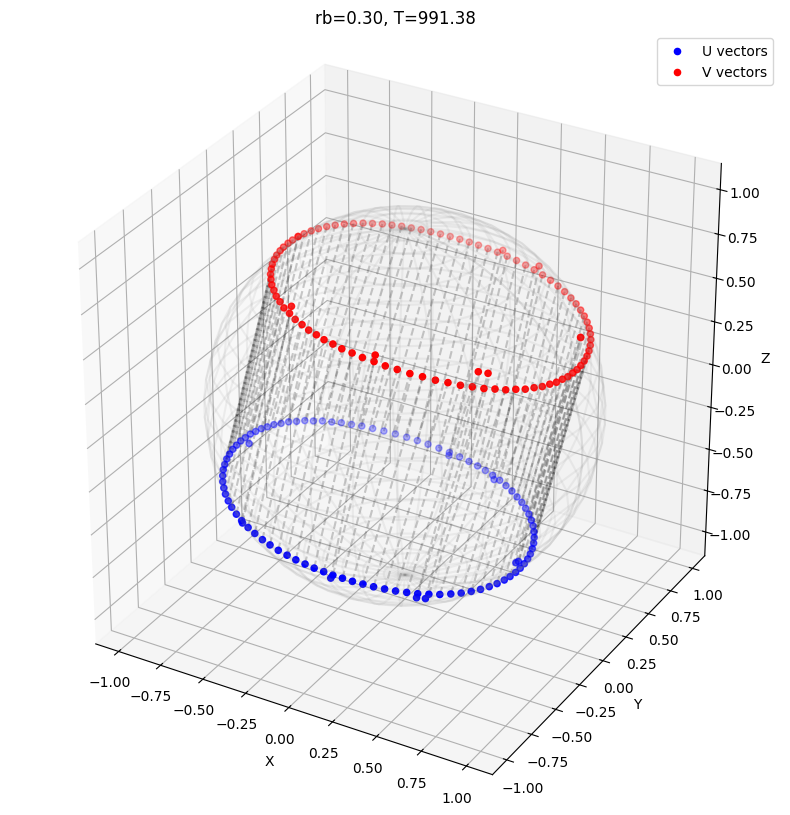

In [33]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
experiment.plot_vectors(
        U_final,
        V_final,
        criterion_final,
        ax=ax
    )
ax.legend()
plt.show

Using device: cpu
Running experiments with: n_classes=100, dim=10, n_epochs=10000
Relative biases to test: [-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]

--- Starting Experiment 1/20 ---
Current Relative Bias: -1.0, Trainable Bias: False, Temp: 10.0
Epoch [100/10000], Loss: 0.6998, Temperature: 6.6326, Relative bias: -1.0000
Epoch [200/10000], Loss: 0.6931, Temperature: 6.6265, Relative bias: -1.0000
Epoch [300/10000], Loss: 0.6931, Temperature: 6.6265, Relative bias: -1.0000
Epoch [400/10000], Loss: 0.6931, Temperature: 6.6265, Relative bias: -1.0000
Epoch [500/10000], Loss: 0.6931, Temperature: 6.6265, Relative bias: -1.0000
Epoch [600/10000], Loss: 0.6931, Temperature: 6.6265, Relative bias: -1.0000
Epoch [700/10000], Loss: 0.6931, Temperature: 6.6265, Relative bias: -1.0000
Epoch [800/1

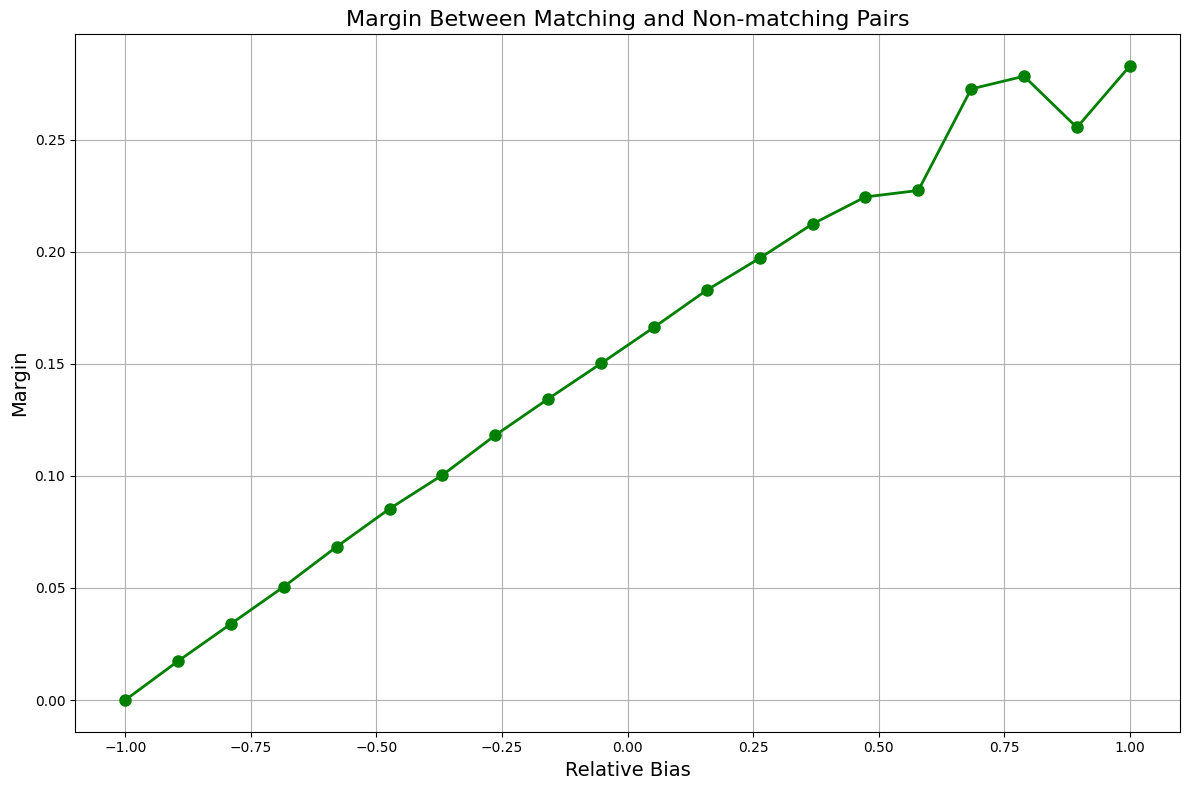

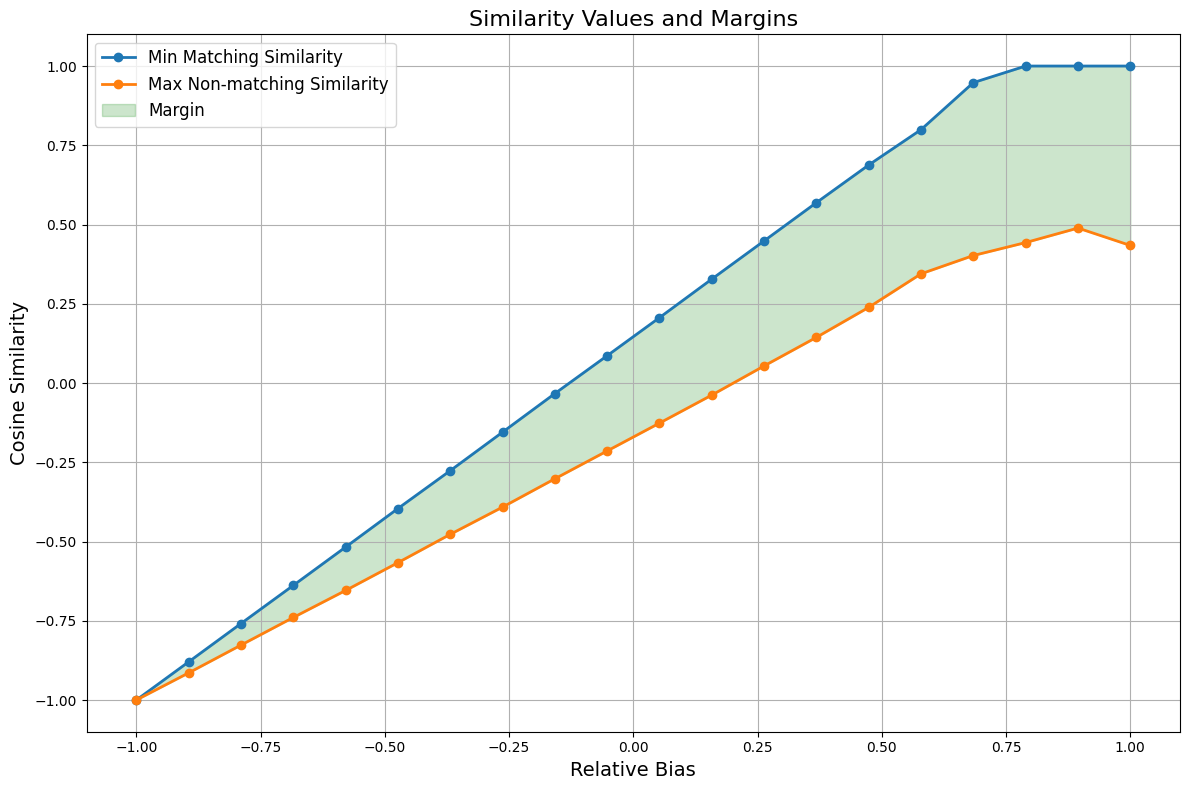


Script finished.


In [54]:
def main():
    torch.manual_seed(42)

    # Experiment parameters
    relative_biases_to_test = np.linspace(-1,1,20)
    n_classes = 100
    dim = 10
    n_epochs = int(1e4)
    initial_temperature = 10.0
    train_the_bias = False

    device_str = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device_str}")
    print(f"Running experiments with: n_classes={n_classes}, dim={dim}, n_epochs={n_epochs}")
    print(f"Relative biases to test: {relative_biases_to_test}")

    all_experiment_results_tuples = [] # To store (U, V, criterion, losses)
    for i, rb_val in enumerate(relative_biases_to_test):
        print(f"\n--- Starting Experiment {i+1}/{len(relative_biases_to_test)} ---")
        print(f"Current Relative Bias: {rb_val}, Trainable Bias: {train_the_bias}, Temp: {initial_temperature}")
        experiment_runner = SigLIPExperiment(
            n_classes=n_classes,
            dim=dim,
            n_epochs=n_epochs,
            device=device_str
        )
        U_final, V_final, criterion_final, losses_history = experiment_runner.train(
            relative_bias=rb_val,
            temperature=initial_temperature,
            trainable_bias=train_the_bias
        )
        all_experiment_results_tuples.append((deepcopy(U_final), deepcopy(V_final), deepcopy(criterion_final), losses_history))
    print("\n--- All Experiments Complete. Analyzing and Plotting Aggregate Results. ---")
    experiment_runner.analyze_results(
        all_results=all_experiment_results_tuples,
        relative_biases=relative_biases_to_test,
    )
    print("\nScript finished.")

if __name__ == "__main__":
    main()